***
# <h1 align = 'center'>Data collection</h1> 
#### <center> Abderahmane BELLAMINE, Manal EL IDRISSI </center>
#### <center> Ecole Centrale Casablanca </center>
#### <center> January 2021 </center>
***

The purpose of this jupyter notebooks file is to collect data from Twitter usng Python and Twitter API (We will use the library Tweepy). To do that, we will use the search_tweets method from the Twitter API that will help us extract existing tweets based on __#covid__ hashtag. 

### Objectives of this file:
- Data Collection 

#### Dependencies import

In [1]:
%config Completer.use_jedi = False

In [27]:
# import the functions from the tweepy library that you will need for authentification

from tweepy import Stream
from tweepy import Cursor
import tweepy
import sys
import string
import time
from tweepy import OAuthHandler, API
import webbrowser
from pprint import pprint
import pandas as pd

#### Authorizing the app to access Twitter

In [28]:
consumer_key = 'UuF3OJx3jT7JX4fc9TnkrySDi'
consumer_secret = 'vev0dqmMaDbJAeP4EqcGFuwD2Cv5zlbxiXrtT1wccbXtCryRZX'
access_token = '3022373122-XCXtmAXJDphZEzWfN4J2JzXhTJ4SuA2M1hsQ90h'
access_secret = '4Zb9Y1l7NAXmpM3oBeSZ9s2kkd8G3ImHKDuJIskpUe8HD'


</br> Setup Twitter Authentification

In [29]:
"""
Twitter Authentification Credentials
Please update with your own credentials
"""

#Athentication Function
def get_twitter_auth():
    """
    @return:
        - the authentification to Twitter
    """
    try:
        cons_key = consumer_key
        cons_secret = consumer_secret
        acc_token = access_token
        acc_secret = access_secret
        
    except KeyError:
        sys.stderr.write("Twitter Environment Variable not Set\n")
        sys.exit(1)
    #Create an OAuthHandler instance into which you will pass your consumer key and secret
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    #Set up your access token so you do not need to re-fetch it each time you make a request
    auth.set_access_token(access_token, access_secret)
    
    return auth

#Client function to access the authentication API
def get_twitter_client():
    """
    @return:
        - the client to access the authentification API
    """
    auth = get_twitter_auth()
    client = tweepy.API(auth, wait_on_rate_limit=True)
    return client

In [30]:
# Set up the Twitter API Client
api = get_twitter_client()

</br> With an authorized API connection in place, we can now issue a request. Test the app's Access by reading metaData on our own profile

In [31]:
api.verify_credentials()

User(_api=<tweepy.api.API object at 0x11417db10>, _json={'id': 3022373122, 'id_str': '3022373122', 'name': 'Ghita Benkirane', 'screen_name': 'ghitabenkirane8', 'location': 'France', 'description': "i don't believe in the republican party nor the democratic party , i just believe in parties", 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 247, 'friends_count': 262, 'listed_count': 3, 'created_at': 'Fri Feb 06 22:46:04 +0000 2015', 'favourites_count': 2546, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 239, 'lang': None, 'status': {'created_at': 'Thu Dec 23 13:45:15 +0000 2021', 'id': 1474013233900052489, 'id_str': '1474013233900052489', 'text': 'Today I was surprisingly asked the hardest question ever about  "moyenne de verres par semaine" i was like https://t.co/3qCaGuzEs8', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 

In [32]:
user = api.get_user(screen_name='twitter')

In [33]:
user

User(_api=<tweepy.api.API object at 0x11417db10>, _json={'id': 783214, 'id_str': '783214', 'name': 'Twitter', 'screen_name': 'Twitter', 'location': 'everywhere', 'profile_location': None, 'description': "What's happening?!", 'url': 'https://t.co/DAtOo6uuHk', 'entities': {'url': {'urls': [{'url': 'https://t.co/DAtOo6uuHk', 'expanded_url': 'https://about.twitter.com/', 'display_url': 'about.twitter.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 60799539, 'friends_count': 0, 'listed_count': 87621, 'created_at': 'Tue Feb 20 14:35:54 +0000 2007', 'favourites_count': 6292, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 14967, 'lang': None, 'status': {'created_at': 'Fri Jan 28 18:25:13 +0000 2022', 'id': 1487129653777154056, 'id_str': '1487129653777154056', 'text': '@breefrmtx tell her Twitter replied to you', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'s

In [34]:
pprint(user._json) # or print(user._json)

{'contributors_enabled': False,
 'created_at': 'Tue Feb 20 14:35:54 +0000 2007',
 'default_profile': False,
 'default_profile_image': False,
 'description': "What's happening?!",
 'entities': {'description': {'urls': []},
              'url': {'urls': [{'display_url': 'about.twitter.com',
                                'expanded_url': 'https://about.twitter.com/',
                                'indices': [0, 23],
                                'url': 'https://t.co/DAtOo6uuHk'}]}},
 'favourites_count': 6292,
 'follow_request_sent': False,
 'followers_count': 60799539,
 'following': False,
 'friends_count': 0,
 'geo_enabled': True,
 'has_extended_profile': True,
 'id': 783214,
 'id_str': '783214',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': None,
 'listed_count': 87621,
 'location': 'everywhere',
 'name': 'Twitter',
 'notifications': False,
 'profile_background_color': 'ACDED6',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme18/bg.gi

#### Extracting Twitter Data : Trending Topics, Trending Places

In [35]:
# Grab Twitter's trending topics using trends_place method, set it to worldwide, and save the results in a list
WOEID = 1
trends = api.get_place_trends(id = WOEID)

In [36]:
trends

[{'trends': [{'name': '#乃木坂46ANN',
    'url': 'http://twitter.com/search?q=%23%E4%B9%83%E6%9C%A8%E5%9D%8246ANN',
    'promoted_content': None,
    'query': '%23%E4%B9%83%E6%9C%A8%E5%9D%8246ANN',
    'tweet_volume': 26327},
   {'name': 'Jeff Zucker',
    'url': 'http://twitter.com/search?q=%22Jeff+Zucker%22',
    'promoted_content': None,
    'query': '%22Jeff+Zucker%22',
    'tweet_volume': 31629},
   {'name': 'Wordle 229',
    'url': 'http://twitter.com/search?q=%22Wordle+229%22',
    'promoted_content': None,
    'query': '%22Wordle+229%22',
    'tweet_volume': 22876},
   {'name': '#GroundhogDay',
    'url': 'http://twitter.com/search?q=%23GroundhogDay',
    'promoted_content': None,
    'query': '%23GroundhogDay',
    'tweet_volume': 43694},
   {'name': 'Commanders',
    'url': 'http://twitter.com/search?q=Commanders',
    'promoted_content': None,
    'query': 'Commanders',
    'tweet_volume': 156756},
   {'name': '#NGWSD',
    'url': 'http://twitter.com/search?q=%23NGWSD',
    'pr

In [37]:
results = api.available_trends()

In [38]:
results

[{'name': 'Worldwide',
  'placeType': {'code': 19, 'name': 'Supername'},
  'url': 'http://where.yahooapis.com/v1/place/1',
  'parentid': 0,
  'country': '',
  'woeid': 1,
  'countryCode': None},
 {'name': 'Winnipeg',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/2972',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 2972,
  'countryCode': 'CA'},
 {'name': 'Ottawa',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3369',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3369,
  'countryCode': 'CA'},
 {'name': 'Quebec',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3444',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3444,
  'countryCode': 'CA'},
 {'name': 'Montreal',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3534',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3534,
  'co

In [39]:
trends_places = [(location['name'], location['country'], location['woeid']) for location in api.available_trends()]


In [40]:
set(trends_places)

{('Abu Dhabi', 'United Arab Emirates', 1940330),
 ('Acapulco', 'Mexico', 110978),
 ('Accra', 'Ghana', 1326075),
 ('Adana', 'Turkey', 2343678),
 ('Adelaide', 'Australia', 1099805),
 ('Aguascalientes', 'Mexico', 111579),
 ('Ahmedabad', 'India', 2295402),
 ('Ahsa', 'Saudi Arabia', 56120136),
 ('Albuquerque', 'United States', 2352824),
 ('Alexandria', 'Egypt', 1522006),
 ('Algeria', 'Algeria', 23424740),
 ('Algiers', 'Algeria', 1253079),
 ('Amman', 'Jordan', 1968902),
 ('Amritsar', 'India', 2295388),
 ('Amsterdam', 'Netherlands', 727232),
 ('Ankara', 'Turkey', 2343732),
 ('Ansan', 'Korea', 1132444),
 ('Antalya', 'Turkey', 2343733),
 ('Antipolo', 'Philippines', 1198785),
 ('Argentina', 'Argentina', 23424747),
 ('Athens', 'Greece', 946738),
 ('Atlanta', 'United States', 2357024),
 ('Auckland', 'New Zealand', 2348079),
 ('Austin', 'United States', 2357536),
 ('Australia', 'Australia', 23424748),
 ('Austria', 'Austria', 23424750),
 ('Bahrain', 'Bahrain', 23424753),
 ('Baltimore', 'United State

In [41]:
# Display the list of trends
pprint(trends)

[{'as_of': '2022-02-02T17:24:06Z',
  'created_at': '2022-01-31T17:09:25Z',
  'locations': [{'name': 'Worldwide', 'woeid': 1}],
  'trends': [{'name': '#乃木坂46ANN',
              'promoted_content': None,
              'query': '%23%E4%B9%83%E6%9C%A8%E5%9D%8246ANN',
              'tweet_volume': 26327,
              'url': 'http://twitter.com/search?q=%23%E4%B9%83%E6%9C%A8%E5%9D%8246ANN'},
             {'name': 'Jeff Zucker',
              'promoted_content': None,
              'query': '%22Jeff+Zucker%22',
              'tweet_volume': 31629,
              'url': 'http://twitter.com/search?q=%22Jeff+Zucker%22'},
             {'name': 'Wordle 229',
              'promoted_content': None,
              'query': '%22Wordle+229%22',
              'tweet_volume': 22876,
              'url': 'http://twitter.com/search?q=%22Wordle+229%22'},
             {'name': '#GroundhogDay',
              'promoted_content': None,
              'query': '%23GroundhogDay',
              'tweet_volume': 4369

In [42]:
# Display the locations with trending topics
trends[0]['locations']

[{'name': 'Worldwide', 'woeid': 1}]

In [43]:
# display the trending topics in France or US (for France 23424819, US 23424977)
trends_in_France = api.get_place_trends(id = 23424819)
trends_in_us = api.get_place_trends(id = 23424977)
pprint(trends_in_France)
pprint(trends_in_us)

[{'as_of': '2022-02-02T17:25:35Z',
  'created_at': '2022-02-01T08:12:27Z',
  'locations': [{'name': 'France', 'woeid': 23424819}],
  'trends': [{'name': '#TEAMG1',
              'promoted_content': None,
              'query': '%23TEAMG1',
              'tweet_volume': None,
              'url': 'http://twitter.com/search?q=%23TEAMG1'},
             {'name': '#TheBookofBobbaFett',
              'promoted_content': None,
              'query': '%23TheBookofBobbaFett',
              'tweet_volume': None,
              'url': 'http://twitter.com/search?q=%23TheBookofBobbaFett'},
             {'name': '#enigmepmu',
              'promoted_content': None,
              'query': '%23enigmepmu',
              'tweet_volume': None,
              'url': 'http://twitter.com/search?q=%23enigmepmu'},
             {'name': '#chandeleur',
              'promoted_content': None,
              'query': '%23chandeleur',
              'tweet_volume': None,
              'url': 'http://twitter.com/search

In [44]:
# Create lists that gathers only data on the resulting trends 
France_data = [(elm['name'], elm['tweet_volume']) for elm in trends_in_France[0]['trends']]
Us_data = [(elm['name'], elm['tweet_volume']) for elm in trends_in_us[0]['trends']]

In [45]:
# show common trends
set(Us_data+France_data)

{('#4mariagespour1lunedemiel', None),
 ('#9YearsWithJungkook', 111432),
 ('#Batsirai', None),
 ('#Beijing2022', 46179),
 ('#BookofBobaFett', 25085),
 ('#Changeons', None),
 ('#DirectAN', None),
 ('#DyingLight2', None),
 ('#EDB2022', None),
 ('#EtoiledeBesseges', None),
 ('#FamillesNombreuses', None),
 ('#GroundhogDay', 43822),
 ('#IncroyablesTransformations', None),
 ('#JMZH2022', None),
 ('#LFLDays', None),
 ('#LesEnseignantsContreMacron', None),
 ('#NGWSD', 10484),
 ('#NSD22', 16070),
 ('#NationalSigningDay', None),
 ('#ONEPIECE1039', None),
 ('#PamAndTommy', None),
 ('#PlanZeroSDF', None),
 ('#REML2022', None),
 ('#TEAMG1', None),
 ('#TakeCommand', 15202),
 ('#TheBookofBobbaFett', None),
 ('#TheMandalorian', None),
 ('#WednesdayMotivation', 48367),
 ('#Wordle228', None),
 ('#WorldReadAloudDay', None),
 ('#WorldWetlandsDay', 30424),
 ('#chandeleur', None),
 ('#crepes', None),
 ('#enigmepmu', None),
 ('#joblife', None),
 ('#lequipeVELO', None),
 ('#logement', None),
 ('#millajasmine',

In [46]:
# show trends by their volume
all_trends = Us_data+France_data
all_trends

[('Jeff Zucker', 32219),
 ('#NGWSD', 10484),
 ('#GroundhogDay', 43822),
 ('Commanders', 157161),
 ('Punxsutawney Phil', 24412),
 ('#BookofBobaFett', 25085),
 ('Summer Walker', 16367),
 ('#TakeCommand', 15202),
 ('Nike app', None),
 ('Whoopi', 253857),
 ('Chris Cuomo', None),
 ('#WorldReadAloudDay', None),
 ('hue jackson', None),
 ('Allison Gollust', None),
 ('Dan Snyder', None),
 ('Brian Flores', 231431),
 ('Toobin', None),
 ('Goro', None),
 ('Pujols', None),
 ('J Crew', None),
 ('The View', 213982),
 ('Jeter', None),
 ('Beal', None),
 ('Mary Trump', None),
 ('Red Wolves', None),
 ('Hawley', 16482),
 ('Judy Blume', None),
 ('Alexander Vindman', 15351),
 ('Red Tails', None),
 ('Nicki', 67820),
 ('Shane McMahon', None),
 ('Dave Filoni', 15638),
 ('Pat Benatar', None),
 ('guardians', 12469),
 ('Cancun', 23150),
 ('Monica Vitti', 28953),
 ('Duran Duran', 21596),
 ('Twosday', None),
 ('Bill Murray', None),
 ('City Girls', None),
 ('Staten Island Chuck', None),
 ('Stony Brook', None),
 ('Chr

In [47]:
# Create a pandas dataframe df from the trending topics list 
df = pd.DataFrame(all_trends, columns=['name', 'tweet_number'])

In [48]:
df.head() # or df.tail()

,name,tweet_number
0,Jeff Zucker,32219.0
1,#NGWSD,10484.0
2,#GroundhogDay,43822.0
3,Commanders,157161.0
4,Punxsutawney Phil,24412.0


In [49]:
# Print information about your dataframe. What do you see?
df.describe(include='all')

,name,tweet_number
count,100,37.000000
unique,98,NaN
top,Dave Filoni,NaN
freq,2,NaN
mean,NaN,63519.459459
std,NaN,78377.657093
min,NaN,10484.000000
25%,NaN,16482.000000
50%,NaN,30424.000000
75%,NaN,48367.000000


In [50]:
# Using df, Clean your data from any undesirable values, and sort your data descendingly  
df.dropna(inplace=True)
df.sort_values(by='tweet_number')

,name,tweet_number
1,#NGWSD,10484.0
64,Abbé Pierre,11996.0
33,guardians,12469.0
7,#TakeCommand,15202.0
27,Alexander Vindman,15351.0
31,Dave Filoni,15638.0
68,Dave Filoni,15660.0
44,#NSD22,16070.0
6,Summer Walker,16367.0
25,Hawley,16482.0


In [51]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [52]:
%matplotlib inline

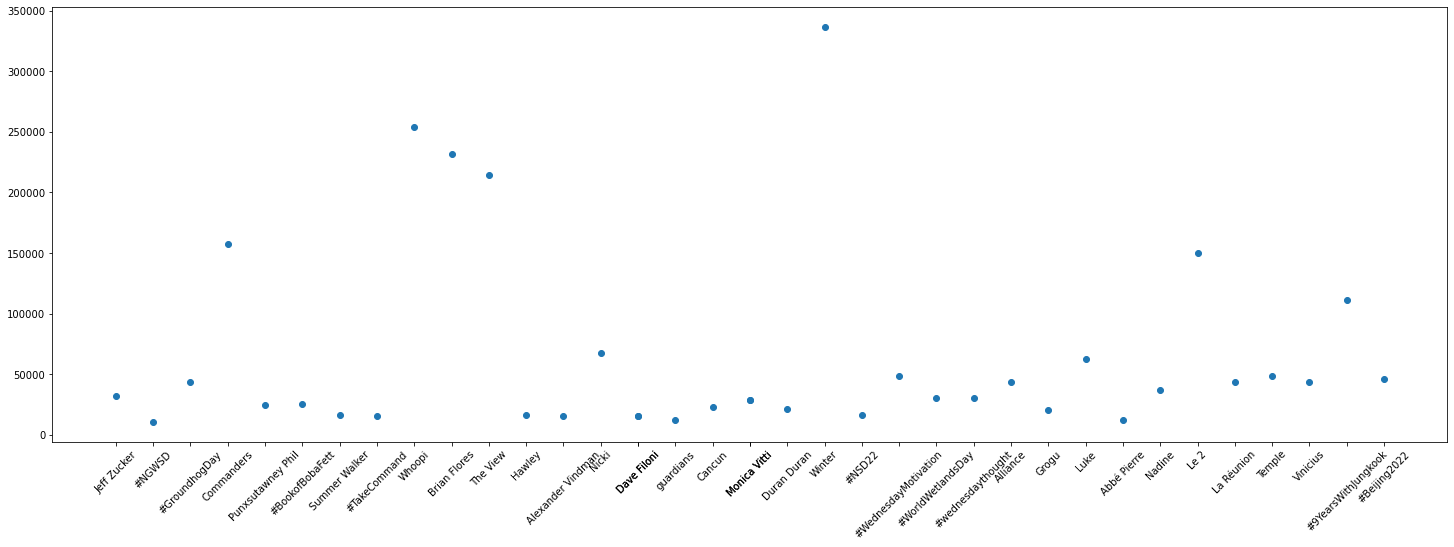

In [53]:
plt.figure(figsize=(25,8))
plt.scatter(df.name, df.tweet_number)
plt.xticks(df.name, rotation=45)
plt.show()

#### Extracting Twitter Data : Searching for tweets 

In [54]:
searchItem = '#sport'

In [55]:
# get tweets from the API
tweets = api.search_tweets(searchItem, tweet_mode='extended',lang = "en")

# store the API responses in a list
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

Total Tweets fetched: 15


In [56]:
# Get the search results using the API's search method
search_results = api.search_tweets(searchItem, tweet_mode='extended',lang = "en")

In [57]:
# Display your results
search_results

[Status(_api=<tweepy.api.API object at 0x11417db10>, _json={'created_at': 'Wed Feb 02 17:26:47 +0000 2022', 'id': 1488926886612852741, 'id_str': '1488926886612852741', 'full_text': 'Donald #Trump Promises To #Ban #Transgender #Women From #Sport If He Is #ReElected.\n\n- #Trans people must be #declared a #suspectclass by the #courts and #strictscrutiny must be applied to all #actions by the #government #targeting #trans #people.\n\nhttps://t.co/bIzxjUXva4', 'truncated': False, 'display_text_range': [0, 272], 'entities': {'hashtags': [{'text': 'Trump', 'indices': [7, 13]}, {'text': 'Ban', 'indices': [26, 30]}, {'text': 'Transgender', 'indices': [31, 43]}, {'text': 'Women', 'indices': [44, 50]}, {'text': 'Sport', 'indices': [56, 62]}, {'text': 'ReElected', 'indices': [72, 82]}, {'text': 'Trans', 'indices': [87, 93]}, {'text': 'declared', 'indices': [109, 118]}, {'text': 'suspectclass', 'indices': [121, 134]}, {'text': 'courts', 'indices': [142, 149]}, {'text': 'strictscrutiny', 'indices':

In [58]:
len(search_results)

15

In [59]:
pprint(search_results[10]._json)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed Feb 02 17:21:19 +0000 2022',
 'display_text_range': [0, 140],
 'entities': {'hashtags': [{'indices': [92, 98], 'text': 'sport'},
                           {'indices': [101, 109], 'text': 'cycling'},
                           {'indices': [112, 123], 'text': 'activewear'},
                           {'indices': [125, 133], 'text': 'outdoor'}],
              'symbols': [],
              'urls': [{'display_url': 'bit.ly/3oaKVuU',
                        'expanded_url': 'https://bit.ly/3oaKVuU',
                        'indices': [68, 91],
                        'url': 'https://t.co/28ycCjGAZC'}],
              'user_mentions': [{'id': 1228013421347500032,
                                 'id_str': '1228013421347500032',
                                 'indices': [3, 11],
                                 'name': 'Surf Sport',
                                 'screen_name': 'srfsprt'},
                                {'id':

In [83]:
# Diplay the texts of the resulting tweets
for tweet in search_results:
    print(tweet._json['full_text'])

Donald #Trump Promises To #Ban #Transgender #Women From #Sport If He Is #ReElected.

- #Trans people must be #declared a #suspectclass by the #courts and #strictscrutiny must be applied to all #actions by the #government #targeting #trans #people.

https://t.co/bIzxjUXva4
RT @HidaViloria: Why Athlete Annet Negesa is Telling Her Story --absolutely astounding. https://t.co/75GaJm8Txi 
#intersex #women #sport ht…
#FollowBack #AndyMurray #Football #Tennis #Sport #Sports #Keyrings Pls Follow &amp; RT!!!!!!!!!!!!!!!!!!!!
RT @globaltele: This 2019 Range Rover was Stolen and recovered within the West Midlands area. 
#rangerover #rangeroversport #sport #4x4 #SU…
RT @srfsprt: Sale. Shop Now @ProvizSports  https://t.co/6FQfH4PXTg
#sport   #cycling   #outdoor   #activewear   #outerwear  #accessories…
@NIHRC @GoTeamNI @TheChrisMosier @SportandRights Really enjoyed this forum. Lots of learning for us all #sport #humanrights
RT @srfsprt: Running Jackets. Shop Now @ProvizSports  https://t.co/BP1YOYlKH


#### Extracting Twitter Data : Streaming tweets 

In [80]:
query = ['#cr7']

In [81]:
query_fname = ' '.join(query)

In [82]:
#Create a Stream object based on the MyListener class we just defined 
stream = Stream(consumer_key, consumer_secret, access_token, access_secret)

In [ ]:
# Filter your Stream object to only include tweets written in English for instance
stream.filter(track=query, languages="en")

In [ ]:
# Disconnect your Stream object
stream.on_disconnect()

### Our Data Collection

In [84]:
#United States is located at latitude 37.09024 and longitude -95.712891
geo_usa = "37.09024,-95.712891,1500km"
#Latitude of England, 52.3555177. Longitude of England, -1.1743197
geo_uk = "52.3555177,-1.1743197,1500km"
#Germany is located at latitude 51.165691 and longitude 10.451526
geo_germany = "51.165691,10.451526,1500km"
search_query = '#covid'

In [85]:
# Function creating final dataframe
def get_tweets_from_user(page_limit=20, count_tweet=200, lang='en', location=geo_usa, search_query=search_query):
    """
    @params:
        - twitter_user_name: the twitter username of a user (company, etc.)
        - page_limit: the total number of pages (max=16)
        - count_tweet: maximum number to be retrieved from a page
        
    @return
        - all the tweets from the user twitter_user_name
    """
    #client = get_twitter_client()
    
    all_tweets = []
    
    for page in Cursor(api.search_tweets, 
                        count=count_tweet,
                        geocode=location,
                        lang=lang,
                        q=search_query).pages(page_limit):
        for tweet in page:
            parsed_tweet = {}
            parsed_tweet['date'] = tweet.created_at
            parsed_tweet['author'] = tweet.user.name
            parsed_tweet['twitter_name'] = tweet.user.screen_name
            parsed_tweet['text'] = tweet.text
            parsed_tweet['language'] = tweet.lang
            parsed_tweet['number_of_likes'] = tweet.favorite_count
            parsed_tweet['number_of_retweets'] = tweet.retweet_count
                
            all_tweets.append(parsed_tweet)
    
    # Create dataframe 
    df = pd.DataFrame(all_tweets)
    
    # Revome duplicates if there are any
    df = df.drop_duplicates( "text" , keep='first')
    
    return df

In [86]:
#usa tweets for filtered by #covid keyword and the language which is set to english by default
usa_tweets = get_tweets_from_user(location=geo_usa)
print("USA tweets Shape: {}".format(usa_tweets.shape))
usa_tweets.to_json("../data/usa_tweets.json")

USA tweets Shape: (1936, 7)


In [87]:
#uk tweets for filtered by #covid keyword and the language which is set to english by default
uk_tweets = get_tweets_from_user(location=geo_uk)
print("UK tweets Shape: {}".format(uk_tweets.shape))
uk_tweets.to_json("../data/uk_tweets.json")

UK tweets Shape: (1996, 7)


In [88]:
#germany tweets for filtered by #covid keyword and the language which is set to english by default
germany_tweets = get_tweets_from_user(location=geo_usa)
print("Germany tweets Shape: {}".format(germany_tweets.shape))
germany_tweets.to_json("../data/germany_tweets.json")

Germany tweets Shape: (1936, 7)
